In [1]:
import os
import sys
import pickle
import cv2
from random import random as rand
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.expanduser('~/ssd/'))
from data.transform import ssd_transform
from data.loader import SSDLoader

In [2]:
roidb_cache_path = '/world/data-gpu-107/wangshuailong/data/cache/coco_roidb.pkl'

In [3]:
with open(roidb_cache_path, 'rb') as f:
    roidb = pickle.load(f)

## ROIDB

[[287. 207. 376. 509.   4.]
 [271.  31. 393. 456.   1.]
 [376. 244. 404. 311.   1.]
 [388. 260. 412. 308.   2.]]
[[4.         0.5605469  0.40429688 0.734375   0.9941406 ]
 [1.         0.5292969  0.06054688 0.7675781  0.890625  ]
 [1.         0.734375   0.4765625  0.7890625  0.6074219 ]
 [2.         0.7578125  0.5078125  0.8046875  0.6015625 ]]
287.0 207.0 376.0 509.0
271.0 31.0 393.0 456.0
376.0 244.0 404.0 311.0
388.0 260.0 412.0 308.0
uint8


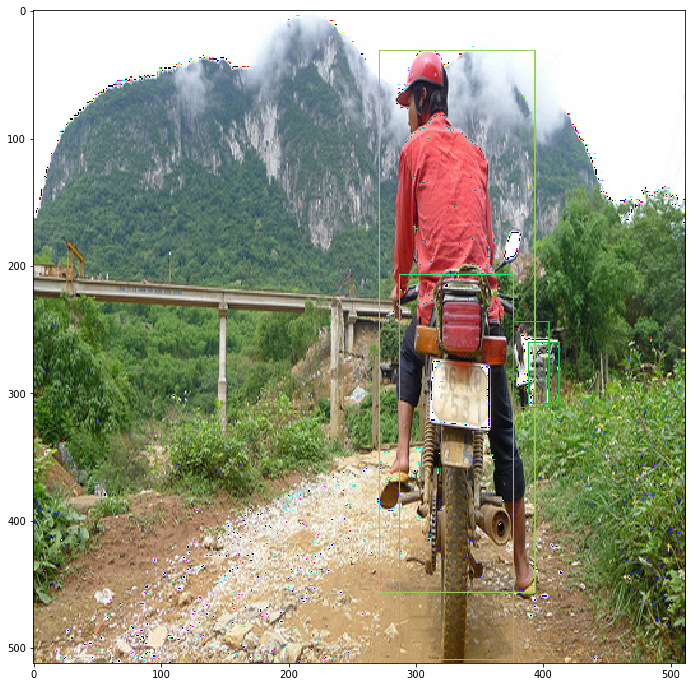

[[138.  66. 279. 413.   1.]
 [240. 364. 361. 395.  44.]
 [266. 298. 489. 412.  56.]
 [291. 192. 321. 248.  72.]]
[[ 1.          0.26953125  0.12890625  0.5449219   0.8066406 ]
 [44.          0.46875     0.7109375   0.7050781   0.7714844 ]
 [56.          0.51953125  0.58203125  0.9550781   0.8046875 ]
 [72.          0.5683594   0.375       0.6269531   0.484375  ]]
138.0 66.0 279.0 413.0
240.0 364.0 361.0 395.0
266.0 298.0 489.0 412.0
291.0 192.0 321.0 248.0
uint8


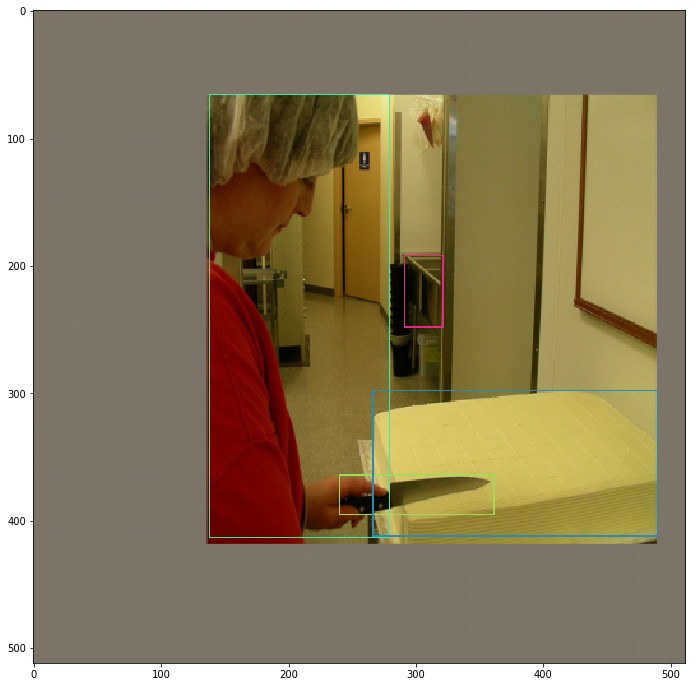

[[137. 169. 268. 318.  20.]
 [ 48. 129. 221. 227.  20.]
 [  2. 129.  50. 163.  20.]
 [187. 103. 209. 134.  20.]
 [  7. 114.  40. 135.  20.]
 [249.  47. 407. 251.  26.]
 [426.  89. 446. 108.  20.]
 [199.  99. 363. 473.   1.]
 [429.  86. 504. 309.   1.]
 [420.  73. 466. 262.   1.]
 [448.  67. 492. 143.   1.]
 [477. 115. 512. 275.   1.]
 [143.  96. 161. 138.   1.]
 [125. 100. 142. 137.   1.]
 [109.  91. 121. 140.   1.]
 [ 78.  92.  90. 132.   1.]
 [178.  86. 191. 132.   1.]
 [209.  86. 218. 129.   1.]
 [228.  85. 234. 131.   1.]
 [495.  73. 504.  88.   1.]
 [156. 132. 235. 166.  20.]
 [220. 121. 249. 166.  20.]
 [  9. 201. 251. 481.  20.]]
[[2.0000000e+01 2.6757812e-01 3.3007812e-01 5.2343750e-01 6.2109375e-01]
 [2.0000000e+01 9.3750000e-02 2.5195312e-01 4.3164062e-01 4.4335938e-01]
 [2.0000000e+01 3.9062500e-03 2.5195312e-01 9.7656250e-02 3.1835938e-01]
 [2.0000000e+01 3.6523438e-01 2.0117188e-01 4.0820312e-01 2.6171875e-01]
 [2.0000000e+01 1.3671875e-02 2.2265625e-01 7.8125000e-02 2.636

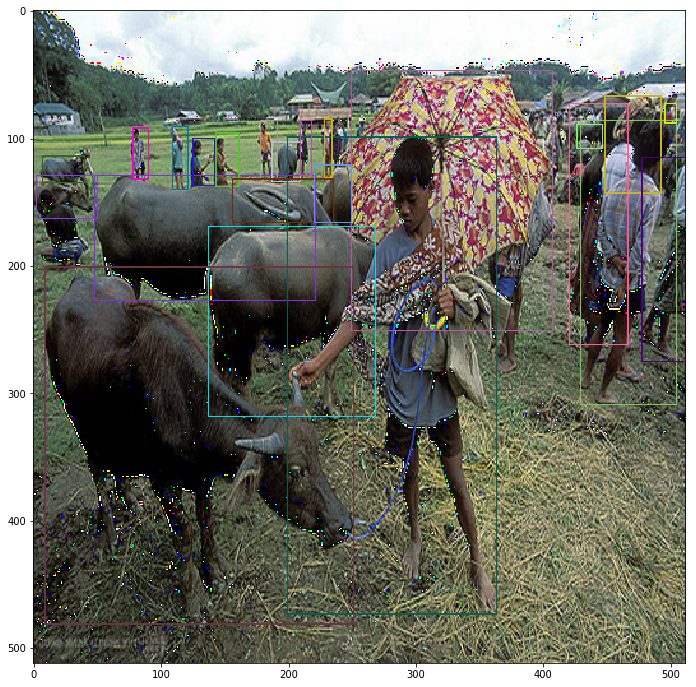

[[ 91.  30. 476. 511.   1.]
 [331.   0. 512. 504.   1.]
 [ 40. 348.  94. 377.  65.]
 [ 70. 475. 140. 506.  65.]
 [ 81. 383. 223. 454.  67.]
 [112. 192. 258. 324.  67.]
 [148. 153. 210. 191.  65.]
 [  4.   0.  47. 246.  63.]
 [ 38.   0.  80. 152.  63.]
 [ 67.   0. 105.  94.  63.]
 [162. 255. 246. 271.  65.]]
[[1.0000000e+00 1.7773438e-01 5.8593750e-02 9.2968750e-01 9.9804688e-01]
 [1.0000000e+00 6.4648438e-01 0.0000000e+00 1.0000000e+00 9.8437500e-01]
 [6.5000000e+01 7.8125000e-02 6.7968750e-01 1.8359375e-01 7.3632812e-01]
 [6.5000000e+01 1.3671875e-01 9.2773438e-01 2.7343750e-01 9.8828125e-01]
 [6.7000000e+01 1.5820312e-01 7.4804688e-01 4.3554688e-01 8.8671875e-01]
 [6.7000000e+01 2.1875000e-01 3.7500000e-01 5.0390625e-01 6.3281250e-01]
 [6.5000000e+01 2.8906250e-01 2.9882812e-01 4.1015625e-01 3.7304688e-01]
 [6.3000000e+01 7.8125000e-03 0.0000000e+00 9.1796875e-02 4.8046875e-01]
 [6.3000000e+01 7.4218750e-02 0.0000000e+00 1.5625000e-01 2.9687500e-01]
 [6.3000000e+01 1.3085938e-01 0.00

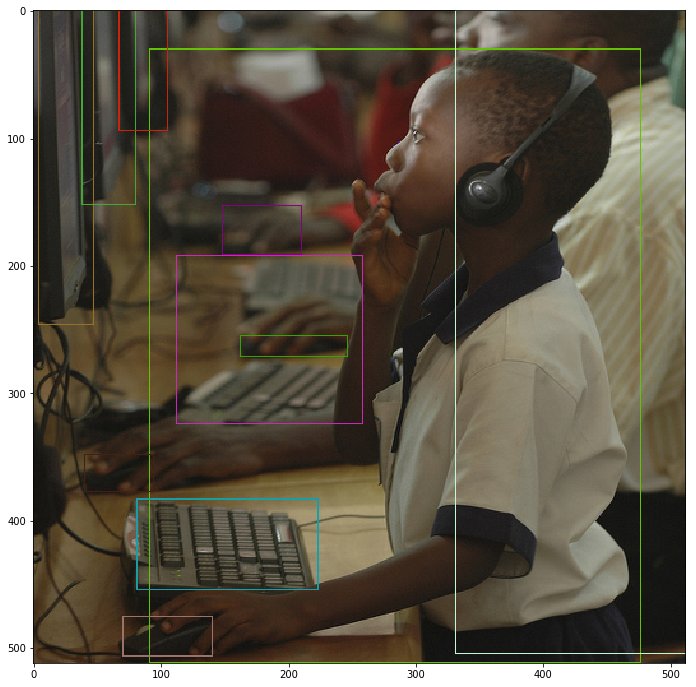

[[360.   0. 490. 425.   1.]
 [155. 397. 218. 451.  65.]
 [136. 218. 186. 244.  65.]
 [157. 309. 271. 397.  67.]
 [186. 181. 286. 243.  67.]
 [233.  92. 298. 135.  67.]
 [230. 163. 291. 180.  65.]
 [136. 267. 213. 300.  65.]
 [179.   0. 467. 467.   1.]
 [216.  81. 234.  89.  65.]
 [186.  44. 225.  81.  67.]]
[[ 1.          0.703125    0.          0.95703125  0.8300781 ]
 [65.          0.30273438  0.7753906   0.42578125  0.8808594 ]
 [65.          0.265625    0.42578125  0.36328125  0.4765625 ]
 [67.          0.30664062  0.6035156   0.5292969   0.7753906 ]
 [67.          0.36328125  0.35351562  0.55859375  0.47460938]
 [67.          0.45507812  0.1796875   0.58203125  0.26367188]
 [65.          0.44921875  0.31835938  0.5683594   0.3515625 ]
 [65.          0.265625    0.5214844   0.41601562  0.5859375 ]
 [ 1.          0.34960938  0.          0.9121094   0.9121094 ]
 [65.          0.421875    0.15820312  0.45703125  0.17382812]
 [67.          0.36328125  0.0859375   0.43945312  0.15820312

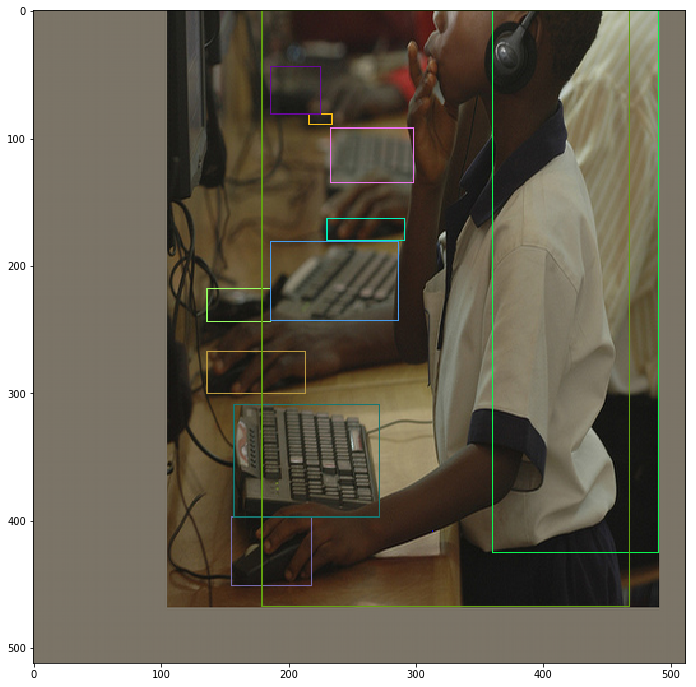

[[355. 232. 381. 267.  16.]
 [439. 249. 444. 263.  40.]
 [425. 264. 432. 270.  40.]
 [355. 223. 422. 314.   1.]
 [422. 231. 451. 262.  59.]
 [314. 225. 349. 311.  73.]
 [408. 241. 418. 249.  75.]
 [427. 268. 437. 271.  45.]
 [420. 256. 433. 262.  46.]
 [424. 249. 430. 254.  50.]
 [415. 258. 422. 262.  50.]
 [419. 253. 422. 256.  50.]
 [413. 257. 419. 261.  50.]
 [332. 310. 368. 332.  70.]
 [415. 262. 451. 275.  72.]
 [394. 290. 414. 316.  27.]
 [421. 253. 428. 257.  50.]
 [427. 252. 434. 257.  50.]
 [422. 251. 424. 254.  50.]]
[[16.          0.6933594   0.453125    0.7441406   0.5214844 ]
 [40.          0.8574219   0.48632812  0.8671875   0.5136719 ]
 [40.          0.8300781   0.515625    0.84375     0.52734375]
 [ 1.          0.6933594   0.43554688  0.82421875  0.61328125]
 [59.          0.82421875  0.45117188  0.8808594   0.51171875]
 [73.          0.61328125  0.43945312  0.6816406   0.6074219 ]
 [75.          0.796875    0.47070312  0.81640625  0.48632812]
 [45.          0.8339844  

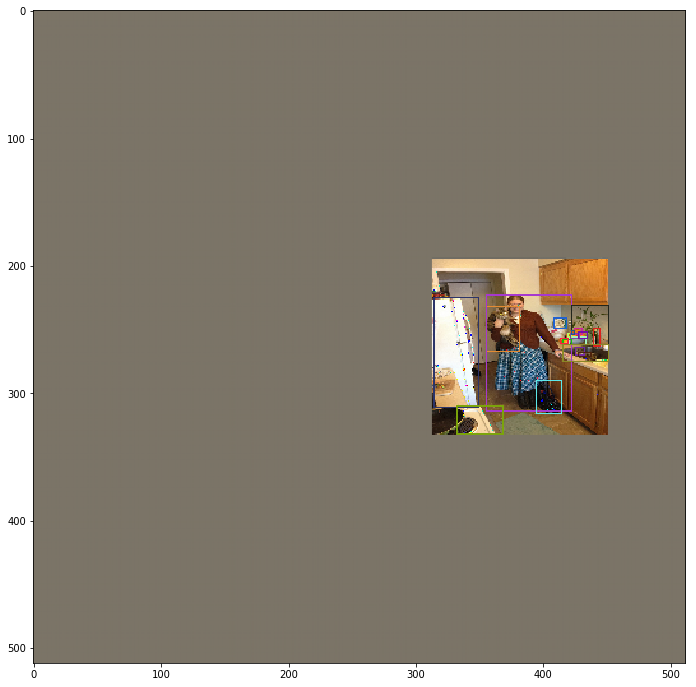

[[ 31.   0. 512. 512.   1.]]
[[1.         0.06054688 0.         1.         1.        ]]
31.0 0.0 512.0 512.0
uint8


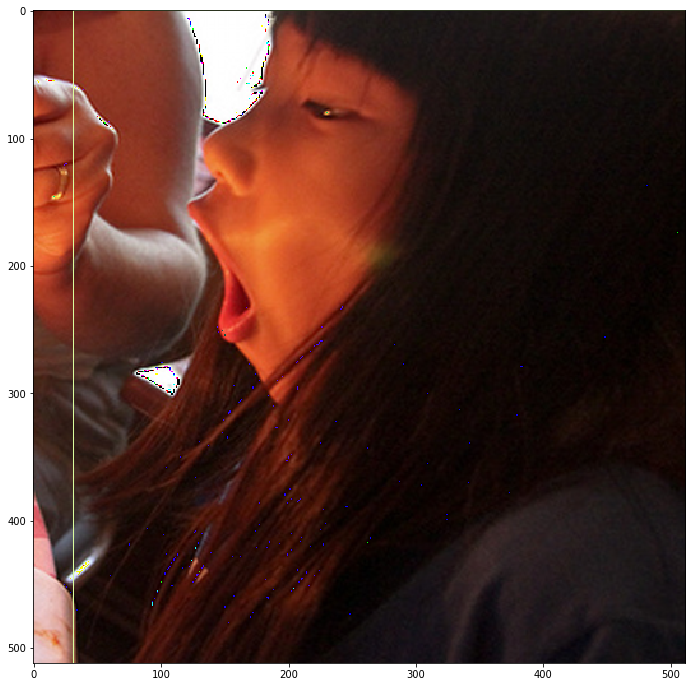

[[127.   0. 244. 132.  70.]]
[[70.          0.24804688  0.          0.4765625   0.2578125 ]]
127.0 0.0 244.0 132.0
uint8


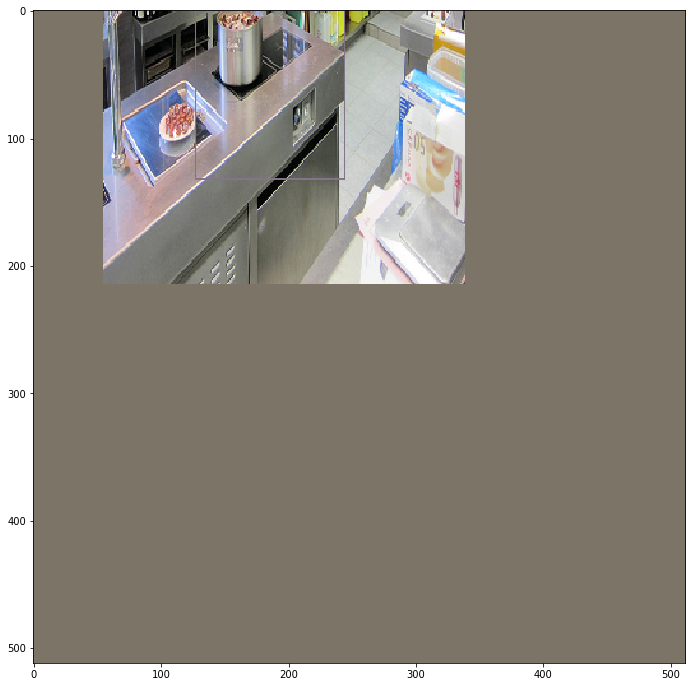

[[405. 412. 417. 501.  40.]
 [414. 429. 424. 512.  40.]
 [  0.   0. 214. 512.   1.]
 [302. 104. 376. 512.   1.]
 [458. 223. 462. 327.  44.]
 [469. 250. 473. 333.  44.]
 [  5. 184.  14. 199.  46.]
 [ 45. 276.  55. 291.  42.]
 [466. 225. 468. 322.  44.]
 [425. 439. 437. 512.  40.]
 [ 59. 220.  66. 231.  42.]
 [466. 361. 477. 384.  42.]
 [447. 352. 453. 365.  42.]
 [ 77. 220.  84. 229.  42.]
 [476. 259. 478. 335.  44.]
 [ 46. 293.  68. 312.  46.]
 [ 26. 299.  44. 314.  46.]
 [436. 331. 462. 359.  46.]
 [ 66. 220.  71. 233.  42.]
 [  6. 184.  13. 199.  42.]]
[[4.00000000e+01 7.91015625e-01 8.04687500e-01 8.14453125e-01
  9.78515625e-01]
 [4.00000000e+01 8.08593750e-01 8.37890625e-01 8.28125000e-01
  1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.17968750e-01
  1.00000000e+00]
 [1.00000000e+00 5.89843750e-01 2.03125000e-01 7.34375000e-01
  1.00000000e+00]
 [4.40000000e+01 8.94531250e-01 4.35546875e-01 9.02343750e-01
  6.38671875e-01]
 [4.40000000e+01 9.16015625e-01 4.88281

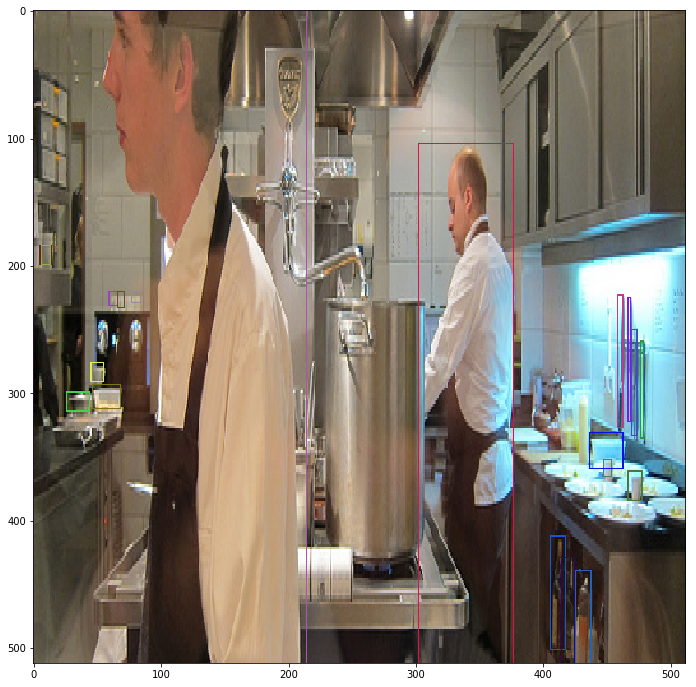

[[269. 261. 274. 280.  40.]
 [391. 267. 416. 400.   1.]
 [318. 243. 394. 419.   1.]
 [210. 270. 299. 403.  69.]
 [302. 379. 336. 415.  70.]
 [376. 344. 397. 409.  70.]
 [393. 368. 407. 404.  70.]
 [210. 398. 416. 453.  61.]]
[[40.          0.5253906   0.5097656   0.53515625  0.546875  ]
 [ 1.          0.7636719   0.5214844   0.8125      0.78125   ]
 [ 1.          0.62109375  0.47460938  0.76953125  0.8183594 ]
 [69.          0.41015625  0.52734375  0.5839844   0.7871094 ]
 [70.          0.58984375  0.7402344   0.65625     0.8105469 ]
 [70.          0.734375    0.671875    0.7753906   0.7988281 ]
 [70.          0.7675781   0.71875     0.7949219   0.7890625 ]
 [61.          0.41015625  0.77734375  0.8125      0.8847656 ]]
269.0 261.0 274.0 280.0
391.0 267.0 416.0 400.0
318.0 243.0 394.0 419.0
210.0 270.0 299.0 403.0
302.0 379.0 336.0 415.0
376.0 344.0 397.0 409.0
393.0 368.0 407.0 404.0
210.0 398.0 416.0 453.0
uint8


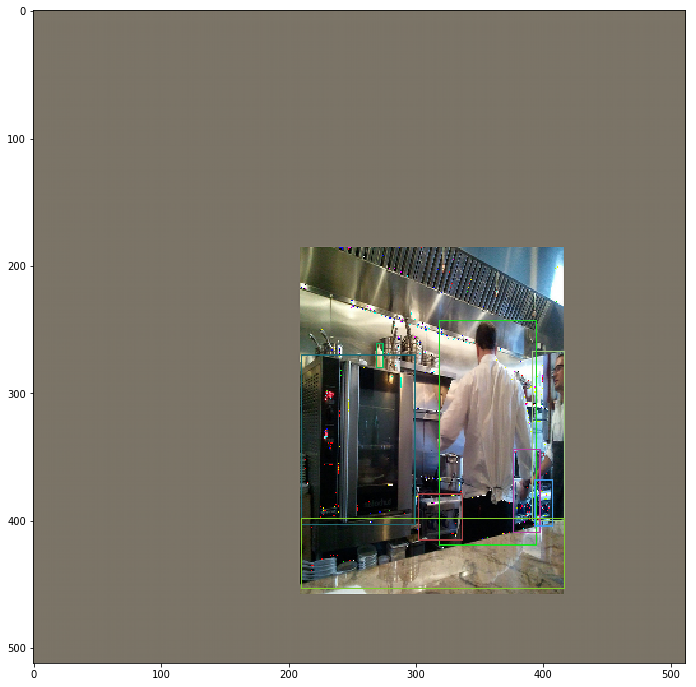

In [23]:
plt.rcParams['figure.figsize'] = (12, 12)

for rec_roidb in roidb[0: 10]:
    img_path = rec_roidb['image']
    gtboxes = rec_roidb['boxes']
    gt_cls = rec_roidb['gt_classes']
    gt_cls = gt_cls[:, np.newaxis]
    
    gtboxes = np.hstack([gtboxes, gt_cls])
    gtboxes = np.array(gtboxes)
    # print (gtboxes)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img, gtboxes = ssd_transform(img, gtboxes)
    print (gtboxes)
    h, w, _ = img.shape
    
    gtboxes[:, 0: 2] /= w
    gtboxes[:, 2: 4] /= h
    
    gtboxes = np.hstack((np.expand_dims(gtboxes[:, 4], axis=1), gtboxes[:, 0: 4]))
    print (gtboxes)
    
    img = img.astype(np.uint8)
    
    for gtbox in gtboxes:
        cls, xmin, ymin, xmax, ymax = gtbox
        
        xmin *= w
        xmax *= w
        ymin *= h
        ymax *= h
        
        print (xmin, ymin, xmax, ymax)
        
        pts = [[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]]
        pts = np.array(pts).astype(np.int32)
        color = (rand()*255, rand()*255, rand()*255)
        thickness = 1
        cv2.polylines(img, [pts], True, color, thickness) 
    print (img.dtype)
    plt.imshow(img)
    plt.show()
    

In [ ]:
train_data = SSDLoader(roidb, batch_size=16)

In [ ]:
data_iter = iter(train_data)

In [ ]:
for data_batch in data_iter:
    data = data_batch.data[0]
    label = data_batch.label[0]
    print ('data shape {}, label shape {}'.format((data.shape), label.shape))

In [ ]:
data_batch = data_iter.next()

In [ ]:
data = data_batch.data[0]
print (data.shape)

label = data_batch.label[0]
print (label.shape)